Пример 1
---
Начнем с простого и вспомним, как применять логистическую регрессию в R. Напишите функцию get_coefficients, которая получает на вход dataframe с двумя переменными x ( фактор с произвольным числом градаций) и y ( фактор с двумя градациями). Функция строит логистическую модель, где y — зависимая переменная, а x — независимая, и возвращает вектор со значением экспоненты коэффициентов модели. 

In [1]:
test_data <- read.csv("https://stepik.org/media/attachments/course/524/test_data_01.csv")
test_data <- transform(test_data, x = factor(x), y = factor(y)) 

In [19]:
get_coefficients <- function(dataset){
    fit <- glm(test_data$y~test_data$x, family = "binomial")
    a <- coef(fit)
    return (sapply(a, exp))
    }

In [20]:
get_coefficients(test_data)

(Intercept) test_data$x2 test_data$x3 
   0.9000000    2.5396825    0.6666667

In [ ]:
# решение степика
get_coefficients  <- function(dataset){    
    fit <- glm(y ~ x, dataset, family = 'binomial')    
    return(exp(fit$coefficients))    
}

Пример 2
----
Если в нашей модели есть количественные предикторы, то в интерцепте мы будем иметь значение, соответствующее базовому уровню категориальных предикторов и нулевому уровню количественных. Это не всегда осмысленно. Например, нам не интересен прогноз для людей нулевого возраста или роста. В таких ситуациях количественную переменную имеет смысл предварительно центрировать так, чтобы ноль являлся средним значением переменной. Самый простой способ центрировать переменную — отнять от каждого наблюдения среднее значение всех наблюдений.

$xcentered_{i}= x_{i} - \bar{x}$

В этом задании вашей задачей будет  написать функцию centered, которая получает на вход датафрейм и имена переменных, которые необходимо центрировать так, как это описано выше. Функция должна возвращать этот же датафрейм, только с центрированными указанными переменными.

In [44]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/cen_data.csv")
test_data

Warning message in file(file, "rt"):
“URL 'https://stepic.org/media/attachments/course/524/cen_data.csv': status was 'Couldn't resolve host name'”

ERROR: Error in file(file, "rt"): cannot open the connection to 'https://stepic.org/media/attachments/course/524/cen_data.csv'


In [42]:
centered <- function(test_data, var_names){
    for (i in var_names){
        mn <- mean(test_data[[i]])
        test_data[i] = test_data[i] - mn
    }
    return(test_data)
}

In [43]:
var_names = c("X4", "X2", "X1")
centered(test_data, var_names)

X1,X2,X3,X4
-1.04,-1.2,10.7,-0.62
-1.44,1.9,9.7,1.68
0.06,-3.5,8.4,1.78
0.06,0.0,7.7,-2.92
2.36,2.8,12.3,0.08


In [ ]:
# решение степика
centered <- function(test_data, var_names){    
    test_data[var_names] <- sapply(test_data[var_names], function(x) x - mean(x))    
    return(test_data)    
}

Пример 3
----
Представьте, что мы работаем в аэропорту в службе безопасности и сканируем багаж пассажиров. В нашем распоряжении есть информация о результатах проверки багажа за предыдущие месяцы. Про каждую вещь мы знаем:

являлся ли багаж запрещенным - is_prohibited (No - разрешенный, Yes - запрещенный) 
его массу (кг) - weight
длину (см) - length
ширину (см) - width
тип багажа (сумка или чемодан) - type.

Напишите функцию get_features , которая получает на вход набор данных о багаже. Строит логистическую регрессию, где зависимая переменная ﻿ - ﻿являлся ли багаж запрещенным, а предикторы - остальные переменные,﻿ и возвращает вектор с названиями статистически значимых переменных (p < 0.05) (в модели без взаимодействия). Если в данных нет значимых предикторов, функция возвращает строку с сообщением  "Prediction makes no sense".

In [77]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_luggage_1.csv")
str(test_data)

'data.frame':	60 obs. of  5 variables:
 $ is_prohibited: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ weight       : int  69 79 82 81 84 81 64 76 77 88 ...
 $ length       : int  53 52 54 50 48 51 53 52 53 52 ...
 $ width        : int  17 21 20 23 19 20 16 20 23 23 ...
 $ type         : Factor w/ 2 levels "Bag","Suitcase": 2 1 2 1 2 1 2 1 2 1 ...


In [53]:
test_data2 <- read.csv("https://stepic.org/media/attachments/course/524/test_luggage_2.csv")

In [90]:
get_features <- function(dataset){
    fit <- glm(is_prohibited ~ weight + length + width + type , dataset, family = "binomial")
    result <- anova(fit, test = "Chisq") #тут и будет вся нужная информация!
    result <- na.omit(result)
    if(sum(result[['Pr(>Chi)']]<0.05) == 0){
        return("Prediction makes no sense")
    }
    else{
        return(rownames(subset(result,`Pr(>Chi)`<0.05)))
    }
}



In [97]:
get_features(test_data)

[1] "Prediction makes no sense"

In [ ]:
# решение степика
get_features <- function(test_data){    
    fit <- glm(is_prohibited ~., test_data, family = 'binomial')    
    result <- anova(fit, test = 'Chisq')    
    if (all(result$`Pr(>Chi)`[-1] > 0.05)){      
        return('Prediction makes no sense')}    
    return(rownames(result)[-1] [result$`Pr(>Chi)`[-1] < 0.05])  
}

In [100]:
fit <- glm(is_prohibited ~., test_data2, family = 'binomial')    
result <- anova(fit, test = 'Chisq') 
result$`Pr(>Chi)`[-1]

[1] 0.184894000 0.010856683 0.002462013 0.010004912

In [104]:
result$`Pr(>Chi)`

[1]          NA 0.184894000 0.010856683 0.002462013 0.010004912

In [103]:
result

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,29,41.58883,NA
weight,1,1.757841,28,39.83099,0.184894000
length,1,6.488626,27,33.34236,0.010856683
width,1,9.168611,26,24.17375,0.002462013
type,1,6.634022,25,17.53973,0.010004912


Пример 3
----
Интересной особенностью логистической регрессии является тот факт, что ее предсказания — это не конкретный класс, к которому мы отнесем новое наблюдение, а вероятность отнесения к каждому из классов! Если вас интересует, как принимать решение о классификации новых объектов в логистической регрессии, посмотрите наш урок по этой теме в курсе по R, где мы разбираем этот вопрос.

В результате, построив регрессионную модель, мы можем сделать вероятностное предсказание для каждого нового наблюдения. Иногда при решении практических задач бывает важным обратить внимание на те объекты, которые получили максимальное значение вероятности принадлежности к одному из классов.

Продолжим нашу работу в службе безопасности! Разобравшись с тем, какие предикторы могут помогать нам предсказывать запрещенный багаж, давайте применим наши знания для повышения безопасности в аэропорту. Обучим наш алгоритм различать запрещенный и разрешенный багаж на уже имеющихся данных и применим его для сканирования нового багажа!

Напишите функцию, которая принимает на вход два набора данных. Первый dataframe, как и в предыдущей задаче, содержит информацию об уже осмотренном багаже (запрещенный или нет, вес, длина, ширина, тип сумки). 

Второй набор данных — это информация о новом багаже, который сканируется прямо сейчас. В данных также есть информация:  вес, длина, ширина, тип сумки и имя пассажира (смотри описание переменных в примере). 

Используя первый набор данных, обучите регрессионную модель различать запрещенный и разрешенный багаж. При помощи полученной модели для каждого наблюдения в новых данных предскажите вероятность того, что багаж является запрещенным. Пассажиров, чей багаж получил максимальное значение вероятности, мы попросим пройти дополнительную проверку. 

Итого, ваша функция принимает два набора данных и возвращает имя пассажира с наиболее подозрительным багажом. Если несколько пассажиров получили максимальное значение вероятности, то верните вектор с несколькими именами. 

В этой задаче для предсказания будем использовать все предикторы, даже если некоторые из них оказались незначимыми. Для предсказания стройте модель без взаимодействия предикторов.

In [1]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data_passangers.csv")
str(test_data)

'data.frame':	30 obs. of  5 variables:
 $ is_prohibited: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ weight       : int  81 72 79 89 87 91 74 76 74 84 ...
 $ length       : int  49 49 60 49 54 42 54 49 49 53 ...
 $ width        : int  13 25 22 24 13 25 17 22 12 26 ...
 $ type         : Factor w/ 2 levels "Bag","Suitcase": 2 2 2 2 2 2 2 2 2 2 ...


In [2]:
data_for_predict <-read.csv("https://stepic.org/media/attachments/course/524/predict_passangers.csv")
str(data_for_predict)

'data.frame':	10 obs. of  5 variables:
 $ weight    : int  81 80 76 87 80 70 95 72 73 76
 $ length    : int  56 47 54 59 59 53 54 42 45 49
 $ width     : int  24 18 20 19 19 21 19 22 23 18
 $ type      : Factor w/ 2 levels "Bag","Suitcase": 2 1 1 1 2 1 2 2 2 1
 $ passangers: Factor w/ 10 levels "Anatoliy","Bob",..: 2 1 3 6 9 8 10 5 4 7


In [25]:
most_suspicious <- function(test_data, data_for_predict){
    fit <- glm(is_prohibited ~., test_data, family = 'binomial')
    pr <- predict(fit, newdata = data_for_predict)
    return(data_for_predict['passangers'][which.max(exp(pr)),])
}

In [26]:
most_suspicious(test_data, data_for_predict)

[1] Svetozar
10 Levels: Anatoliy Bob Ivan Martin Nikolay Polina Poul Svetozar ... Vsevolod

In [ ]:
# решение степика 
most_suspicious <- function(test_data, data_for_predict){ 
    
    # модель логистической регрессии
    fit <- glm(is_prohibited ~., test_data, family = 'binomial')
    
    # делаем вероятностное предсказание для каждого нового наблюдения
    probs <- predict(fit, newdata = data_for_predict, type = 'response') 
    
    # получаем номер(а) пассажиров с максимальной вероятностью подозрительного багажа 
    index <- which(probs == max(probs))  
    
    # получаем имя(имена) подозрительных пассажиров 
    passanger_name <- data_for_predict$passangers[index]
    
    return(passanger_name)    
}

Пример 4
----
Напишите функцию normality_test, которая получает на вход dataframe с произвольным количеством переменных разных типов (количественные, строки, факторы) и проверяет нормальность распределения количественных переменных. Функция должна возвращать вектор значений p-уровней значимости теста shapiro.test для каждой количественной переменной.

Вот такая задача уж точно встретится вам в реальной практике не один раз!

```r
> normality_test(iris)
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
1.018116e-02 1.011543e-01 7.412263e-10 1.680465e-08 

> test <- read.csv("https://stepic.org/media/attachments/course/524/test.csv")
> normality_test(test)
         V1          V3          V5          V6 
0.568208352 0.245833708 0.314189423 0.009373741 
```

In [81]:
test <- read.csv("https://stepic.org/media/attachments/course/524/test.csv")
str(test)

'data.frame':	10 obs. of  6 variables:
 $ V1: num  10.03 12.45 9.97 10.53 6.59 ...
 $ V2: Factor w/ 10 levels "a","b","f","g",..: 8 9 1 3 2 5 4 7 6 10
 $ V3: num  9.35 11.61 7.02 12.24 7.72 ...
 $ V4: Factor w/ 10 levels "a","b","f","g",..: 8 9 1 3 2 5 4 7 6 10
 $ V5: num  9.91 10.07 8.85 7.22 14.31 ...
 $ V6: num  11.23 6.41 11.38 8.71 10.08 ...


In [54]:
normality_test <- function(dataset){
    num_clm <- sapply(dataset, is.numeric)
    result <- sapply(dataset[num_clm ], shapiro.test)
    t(unlist(result['p.value', ]))
}

In [55]:
normality_test(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.01018116,0.1011543,7.412263e-10,1.680465e-08


In [ ]:
# решение степика
normality_test <- function(dataset){    
    numeric_var <- sapply(dataset, is.numeric)  
    sapply(dataset[numeric_var], function(x) shapiro.test(x)$p.value)    
}

In [85]:
normality_test1 <- function(dataset){
    sapply(Filter(is.numeric, dataset), function(x) shapiro.test(x)$p.value)
}

normality_test2 <- function(dataset){    
    numeric_var <- sapply(dataset, is.numeric)  
    sapply(dataset[numeric_var], function(x) shapiro.test(x)$p.value)    
}

library('dplyr')
normality_test3 <- function(dataset){
    sapply(select_if(dataset, is.numeric), function(x) shapiro.test(x)$p.value)
}

library('microbenchmark')
t <- microbenchmark(normality_test1(test),
                    normality_test2(test),
                    normality_test3(test))
           
summary(t)

expr,min,lq,mean,median,uq,max,neval
normality_test1(test),329.477,347.480,444.0844,364.757,399.765,3384.048,100
normality_test2(test),340.440,354.181,447.1293,371.354,400.225,3910.533,100
normality_test3(test),1749.914,1808.055,2246.9136,1889.149,2096.615,15866.920,100


Пример 5
---
Напишите функцию smart_anova, которая получает на вход dataframe с двумя переменными x и y. Переменная x — это количественная переменная, переменная y - фактор, разбивает наблюдения на три группы.

Если распределения во всех группах значимо не отличаются от нормального, а дисперсии в группах гомогенны, функция должна сравнить три группы при помощи дисперсионного анализа и вернуть ﻿именованный вектор со значением p-value, имя элемента — "ANOVA".

Если хотя ﻿бы в одной группе распределение значимо отличается от нормального или дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса и возвращает именованный вектор со значением p-value, имя вектора  — "KW".

Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

Дисперсии будем считать не гомогенными, если в тесте bartlett.test() p < 0.05.

Пример работы функции:
```r
> test_data <- read.csv("https://stepic.org/media/attachments/course/524/s_anova_test.csv")
> str(test_data)
'data.frame':	30 obs. of  2 variables:
 $ x: num  1.08 0.07 -1.02 -0.45 0.81 -1.27 -0.75 1.47 -0.2 -1.48 ...
 $ y: Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 1 1 1 1 ...
> smart_anova(test_data)
   ANOVA 
0.265298
```

In [1]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/s_anova_test.csv")

In [ ]:
smart_anova <- function(test){  
    p_normal <- unlist(by(test[, 1], test[, 2], function(x) shapiro.test(x)$p.value))   
    sd_equal <- bartlett.test(x ~ y, test)$p.value  
    if (all(p_normal > 0.05) & sd_equal > 0.05){    
        fit <- aov(x ~ y, test)    
        result <- c(ANOVA = summary(fit)[[1]]$'Pr(>F)'[1])     
    } else {    
        fit <- kruskal.test(x ~ y, test)    
        result <- c(KW = fit$p.value)
    }    
    return(result)   
}

In [68]:
# вытащить p_value: anova(aov(x ~ y, df))$P[1]
smart_anova <- function(df){
    all.normal <- all(aggregate(x ~ y, df, function(x) shapiro.test(x)$p)$x >= 0.05)
    all.homogen <- bartlett.test(x ~ y, df)$p.value >= 0.05
                                
    if(all.normal & all.homogen){
    c(ANOVA = anova(aov(x ~ y, df))$P[1])
        
  } else {
    c(KW = kruskal.test(x ~ y, df)$p.value)
  }
}

In [69]:
smart_anova(test_data)

ANOVA 
0.265298

Пример 6
---
Напишите функцию normality_by, которая принимает на вход dataframe c тремя переменными. Первая переменная количественная, вторая и третья имеют две градации и разбивают наши наблюдения на группы. Функция должна проверять распределение на нормальность в каждой получившейся группе и возвращать dataframe с результатами применения теста shapiro.test (формат вывода смотри ниже).

Рассмотрим пример работы функции. В данных mtcars есть две группирующие переменные am и vs, и обе переменные имеют две градации 0 и 1. В результате получаем 4 группы:

```
am vs
1 1
1 0
0 1
0 0
```

Теперь для переменной mpg в каждой из четырех групп можно проверить распределение на нормальность при помощи функции shapiro.test  и вывести получившийся p-value:

```r
> normality_by(mtcars[, c("mpg", "am", "vs")])
  am vs   p_value
1  0  0 0.5041144
2  0  1 0.6181271
3  1  0 0.5841903
4  1  1 0.4168822

> test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")
> str(test_data)
'data.frame': 40 obs. of  3 variables:
 $ x: num  10.9 14 8.1 11 9.5 11 8.5 11.7 5.4 6.8 ...
 $ y: int  1 1 0 1 1 0 0 0 0 1 ...
 $ z: int  2 2 2 3 3 3 3 3 2 3 ...
> normality_by(test_data)
  y z    p_value
1 0 2 0.21976723
2 0 3 0.62381802
3 1 2 0.19603547
4 1 3 0.04782269
```

Итого: функция должна возвращать dataframe размером 4 на 3. 

Название столбцов:

1. — имя первой группирующей переменной
2. — имя второй группирующей переменной
3. — p_value 

In [78]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")

In [ ]:
normality_by <- function(test){    
    grouped_data <- aggregate(test[,1],by=list(test[,2], test[,3]),                                  
        FUN = function(x) {shapiro.test(x)$p.value})                                  
    names(grouped_data) <- c(colnames(test)[2:3],'p_value')                                  
    return(grouped_data)    
}

In [79]:
library("dplyr")
test_data %>% 
  group_by(y, z) %>% 
  summarise(p.value = shapiro.test(x)$p.value)

y,z,p.value
0,2,0.21976723
0,3,0.62381802
1,2,0.19603547
1,3,0.04782269


In [86]:
# Используя dplyr (при условии, что мы знаем имена переменных в данных):
library('dplyr')    
normality_by <- function(test_data){    
    result <- test_data %>% 
        group_by(y, z) %>%     
        summarize(p_value = shapiro.test(x)$p.value)     
    return(result)    
}
   

In [ ]:
# Более общее решениее
library('dplyr')    
get_p_value <- function(x){      
    shapiro.test(x)$p.value    
}    
normality_by <- function(test){    
    grouped <- test %>%    
        group_by_(.dots = colnames(.)[2:3]) %>%         
        summarise_each(funs(get_p_value))         
        names(grouped)[3] <- 'p_value'
    
    return(grouped)         
}

In [ ]:
normality_by <- function(test){
  colnames(test)[1] <- 'p_value'
  aggregate(p_value ~ . ,test,function(x) shapiro.test(x)$p.value)
}

Пример 7
----
Тесты тестами, а графики никто не отменял! Мой вам совет: всегда визуализируйте ваши переменные и их взаимосвязи. Иногда то, что сразу становится видным на графике (например, выброс или очевидно странная форма распределения), может ускользнуть от внимания во время статистического анализа. 

При помощи библиотеки ggplot2 визуализируйте распределение переменной Sepal.Length в трех группах в данных Iris. Сохраните график в переменную obj, но не выводите график на печать.

Должно получиться:

[Image: https://ucarecdn.com/eac34dba-774d-4e90-9e97-e6c053b7dd97/]








На ответ это не повлияет, но чтобы сделать плотности распределения прозрачными, используйте аргумент alpha в настройках geom_density:

```r
geom_density(alpha = 0.2) 
# величина значения alpha определяет степень прозрачности
```
 

Классные графики в ggplot2, не правда ли?) А при помощи чего вы визуализируете даные?


In [94]:
library(ggplot2)
obj <- ggplot(iris, aes(Sepal.Length, fill = Species)) + 
    geom_density(alpha = 0.2)

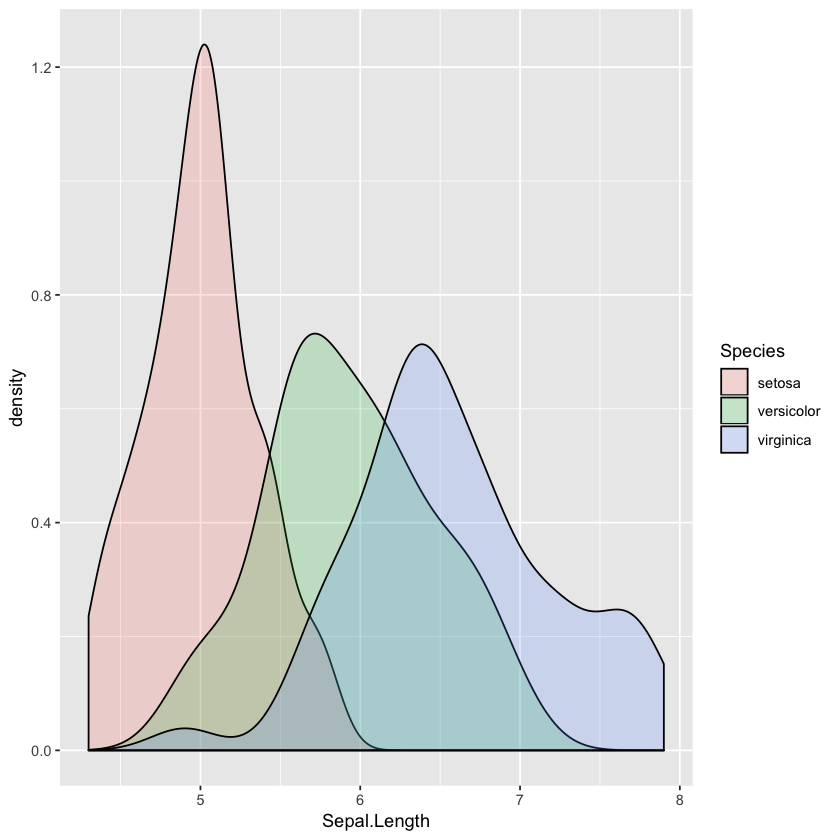

In [95]:
obj